#Let's make our first Network in NetworkX!

###Basic Imports

In [1]:
import networkx as nx
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)
from IPython.display import YouTubeVideo

Let's pick one scene that really highlights why network analysis is important

In [2]:
YouTubeVideo("xw9wY4u3BgU")

Let's map this out. First, let's make a list of all of the characters in this scene. NetworkX can take an iterable container of nodes (in this case, we'll pass a list).

In [3]:
list_of_characters = [
    'Cady',
    'Regina',
    'Gretchen',
    'Karen',
    'Jason',
    'Taylor',
    'Mrs. Wedell'
]

Next, we need a list of interactions between characters. For most of this presentation we'll only be using actual conversation between characters, but we'll fudge that rule for dramatic effect here.

NetworkX generally expects a list of tuples to generate edges, where each tuple is one interaction between two nodes. If there are interactions between a group, you'll need to pass however many pair-interactions necessary to map it.

In [4]:
interactions = [
    ('Cady', 'Regina'),
    ('Cady', 'Gretchen'),
    ('Cady', 'Karen'),
    ('Regina', 'Gretchen'),
    ('Regina', 'Karen'),
    ('Gretchen', 'Karen'),
    ('Jason', 'Taylor'),
    ('Regina', 'Mrs. Wedell'),
    ('Mrs. Wedell', 'Taylor'),
    ('Jason', 'Gretchen')
]

We need to instantiate a NetworkX Graph object to generate our actual graph, then load in the nodes and edges.

In [5]:
mall = nx.Graph()
mall.add_nodes_from(list_of_characters)
mall.add_edges_from(interactions)

Let's look at some basic statistics on our network

##Centrality

In [6]:
print nx.info(mall)

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 10
Average degree:   2.8571


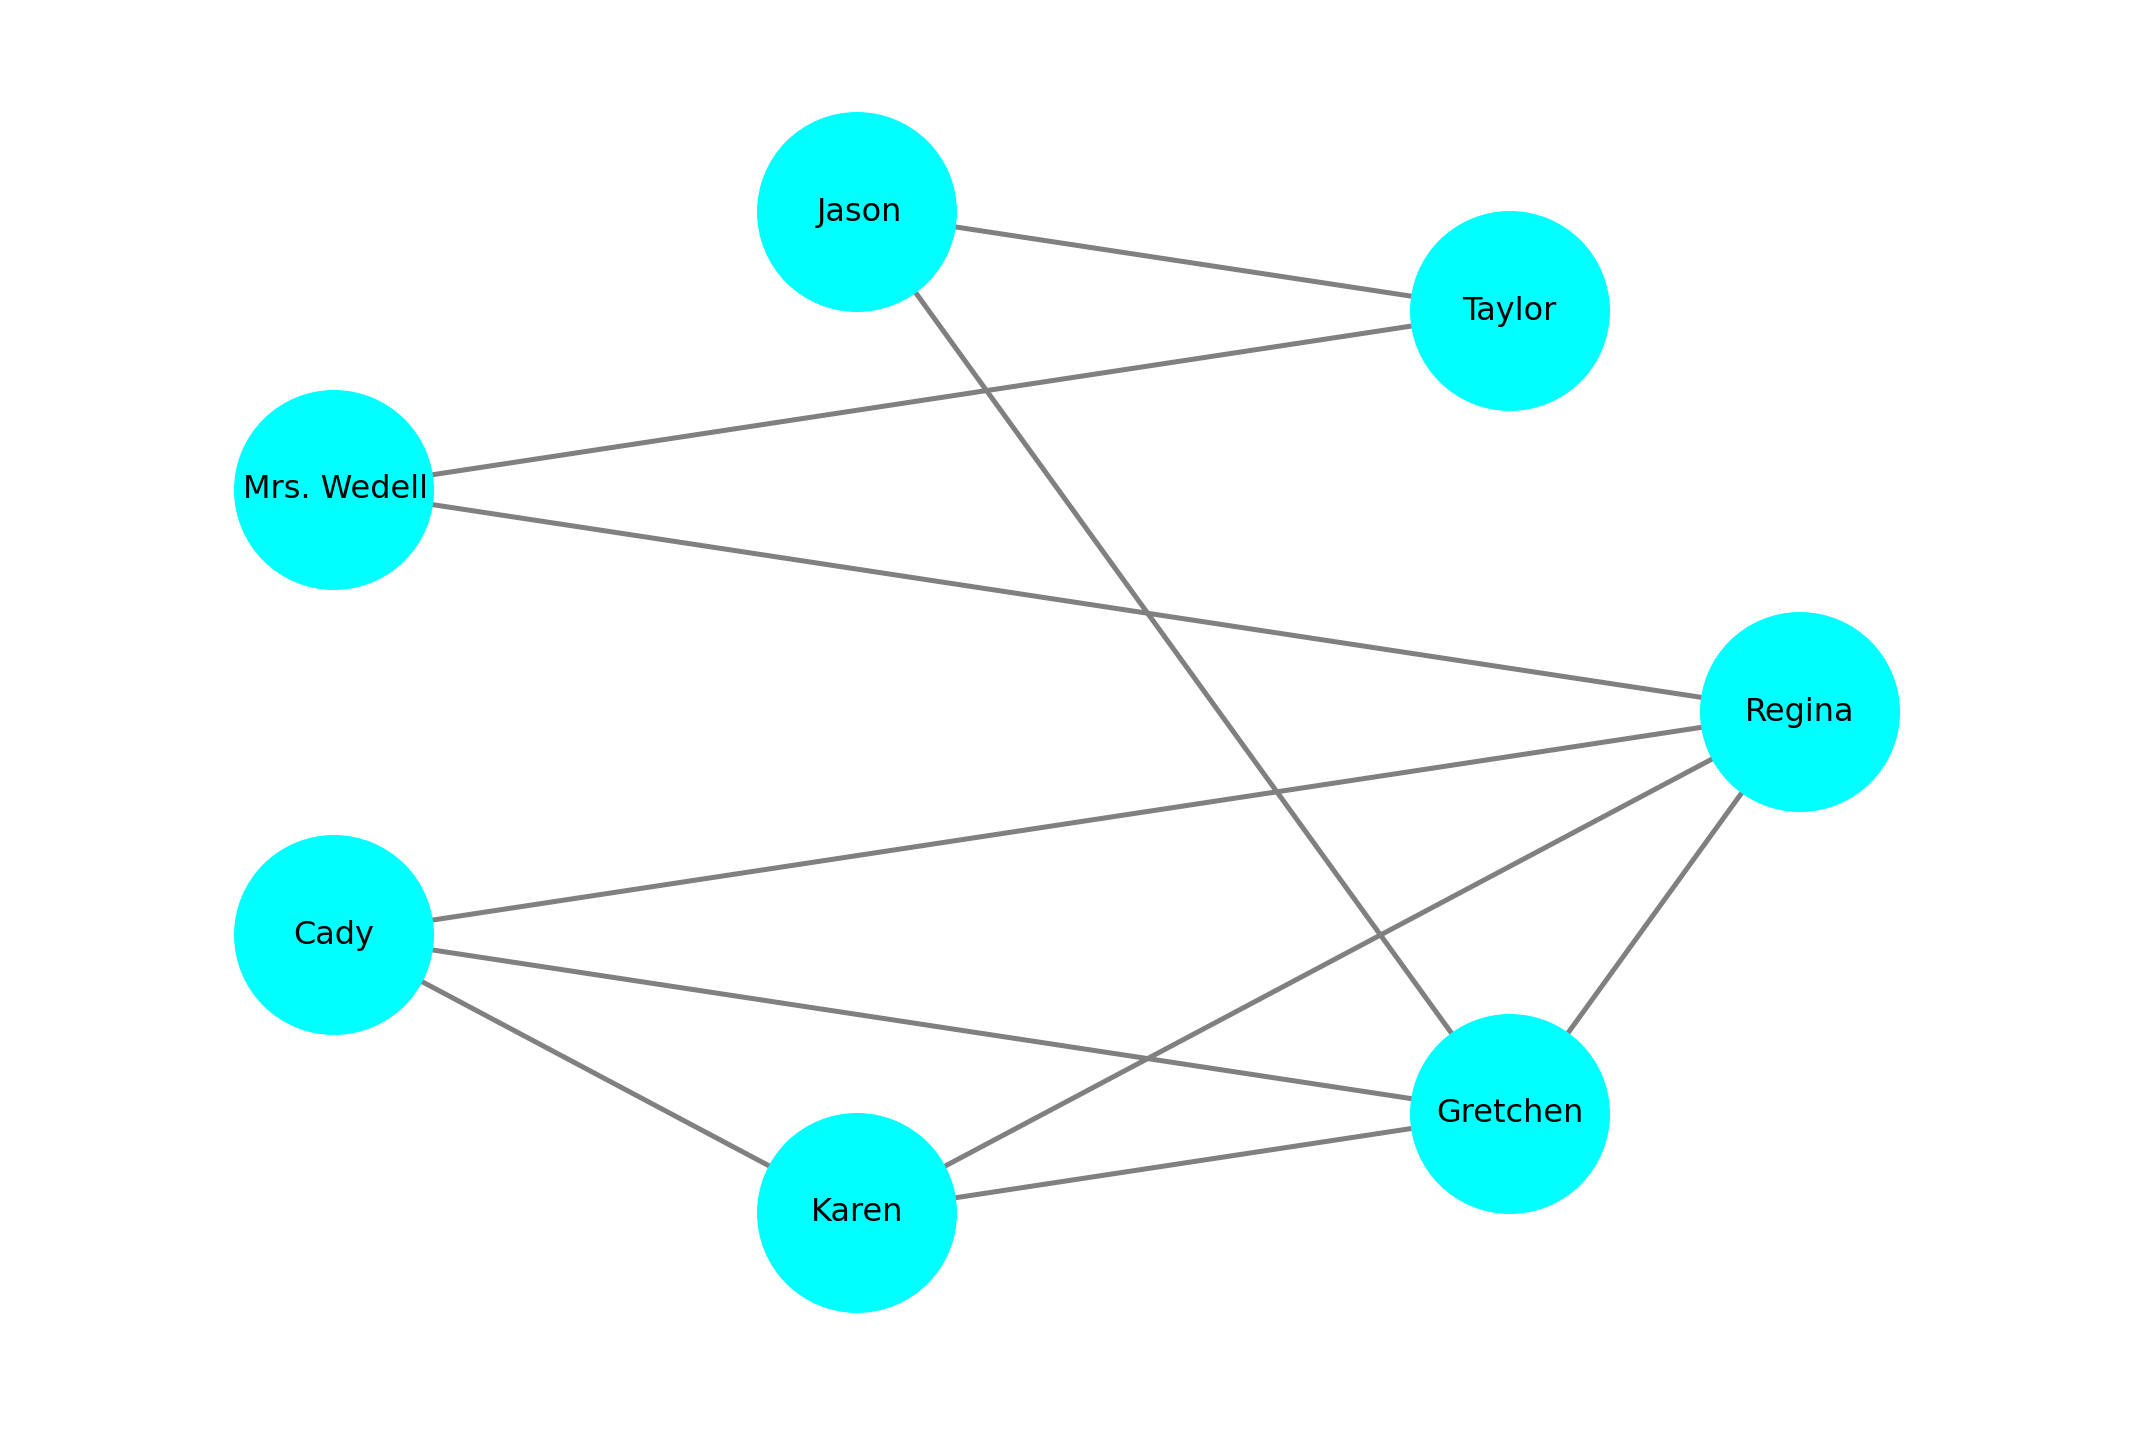

In [8]:
pos = nx.circular_layout(mall)

nx.draw_networkx_nodes(mall, pos, node_size=40000, node_color='aqua', linewidths=0)
nx.draw_networkx_edges(mall, pos, edge_color='gray', width=5)
nx.draw_networkx_labels(mall, pos, font_size=32)
plt.axis('off')
plt.tight_layout()

So we have a network with 7 nodes, 10 edges between those nodes, and each node is connected to 2.85 other nodes. What's the distribution of degrees?

In [9]:
nx.degree(mall)

{'Cady': 3,
 'Gretchen': 4,
 'Jason': 2,
 'Karen': 3,
 'Mrs. Wedell': 2,
 'Regina': 4,
 'Taylor': 2}

What's the center of this network? 

Degree Centrality gives us the fraction of all nodes that a given node is connected to, normalized by the maximum possible degree in the graph. In other words, it looks something like:

$$centrality_{degree} = \frac{U_i}{N-1}$$

where $N$ is the number of nodes in the graph and $U_i$ is a specific node

In [10]:
degree_centrality = nx.degree_centrality(mall)
degree_centrality

{'Cady': 0.5,
 'Gretchen': 0.6666666666666666,
 'Jason': 0.3333333333333333,
 'Karen': 0.5,
 'Mrs. Wedell': 0.3333333333333333,
 'Regina': 0.6666666666666666,
 'Taylor': 0.3333333333333333}

So, Regina George and Gretchen Weiners have the highest degree centrality. They're most connected directly to the most people. 

We could also use closeness centrality. Closeness centrality uses the shortest path between all other nodes to one specific one. 

$$centrality_{closeness} = \frac{n - 1}{\sum^{n-1}_{v=1}d(v,u)}$$

where $n - 1$ is the the number of nodes in the graph (minus one) and $\sum^{n-1}_{v=1}d(v,u)$ is the sum of all the shortest paths from every other node to node $u$

In [11]:
closeness_centrality = nx.closeness_centrality(mall)
closeness_centrality

{'Cady': 0.6,
 'Gretchen': 0.75,
 'Jason': 0.6,
 'Karen': 0.6,
 'Mrs. Wedell': 0.6,
 'Regina': 0.75,
 'Taylor': 0.5}

So, Regina and Gretchen have the highest closeness centrality. Why does this make sense?

We could also use betweeness centrality. Betweeness centrality essentially asks "How often is the shortest path between two nodes involve this one?"

We find betweeness centrality by summing up the number of shortest paths between every pair of nodes that passes through the node in question, divided by the number of shortest paths between every pair of nodes.

$$centrality_{betweeness} = \sum\limits_{s,t\in V}\frac{\sigma(s, t | v)}{\sigma(s, t)}$$

where $s$ and $t$ are any two other ndoes, $\sigma(s, t | v)$ is the number of all shortest paths between $s$ and $t$  that go through the node in question ($v$) and $\sigma(s, t)$ is the number of shortest paths between $s$ and $t$ overall.

In [12]:
betweenness_centrality = nx.betweenness_centrality(mall)
betweenness_centrality

{'Cady': 0.0,
 'Gretchen': 0.26666666666666666,
 'Jason': 0.13333333333333333,
 'Karen': 0.0,
 'Mrs. Wedell': 0.13333333333333333,
 'Regina': 0.26666666666666666,
 'Taylor': 0.06666666666666667}

So, again, Regina George and Gretchen are the most "central." Why?

##Connectedness

If all the nodes are connected to each other, the graph is connected. If not, it's disconnected

In [13]:
nx.is_connected(mall)

True

In [14]:
nx.number_connected_components(mall)

1

In [15]:
nx.isolates(mall)

[]

##Node Removal

The network looks very different before Regina calls Mrs. Wedell

In [16]:
mall_pre_phonecall = nx.Graph()
mall_pre_phonecall.add_nodes_from(list_of_characters)
interactions.remove(('Regina', 'Mrs. Wedell'))
mall_pre_phonecall.add_edges_from(interactions)

In [17]:
print nx.info(mall_pre_phonecall)

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 9
Average degree:   2.5714


So, with one edge being dropped, there's a 0.3 drop in the average degree as well. What does the network look like now?

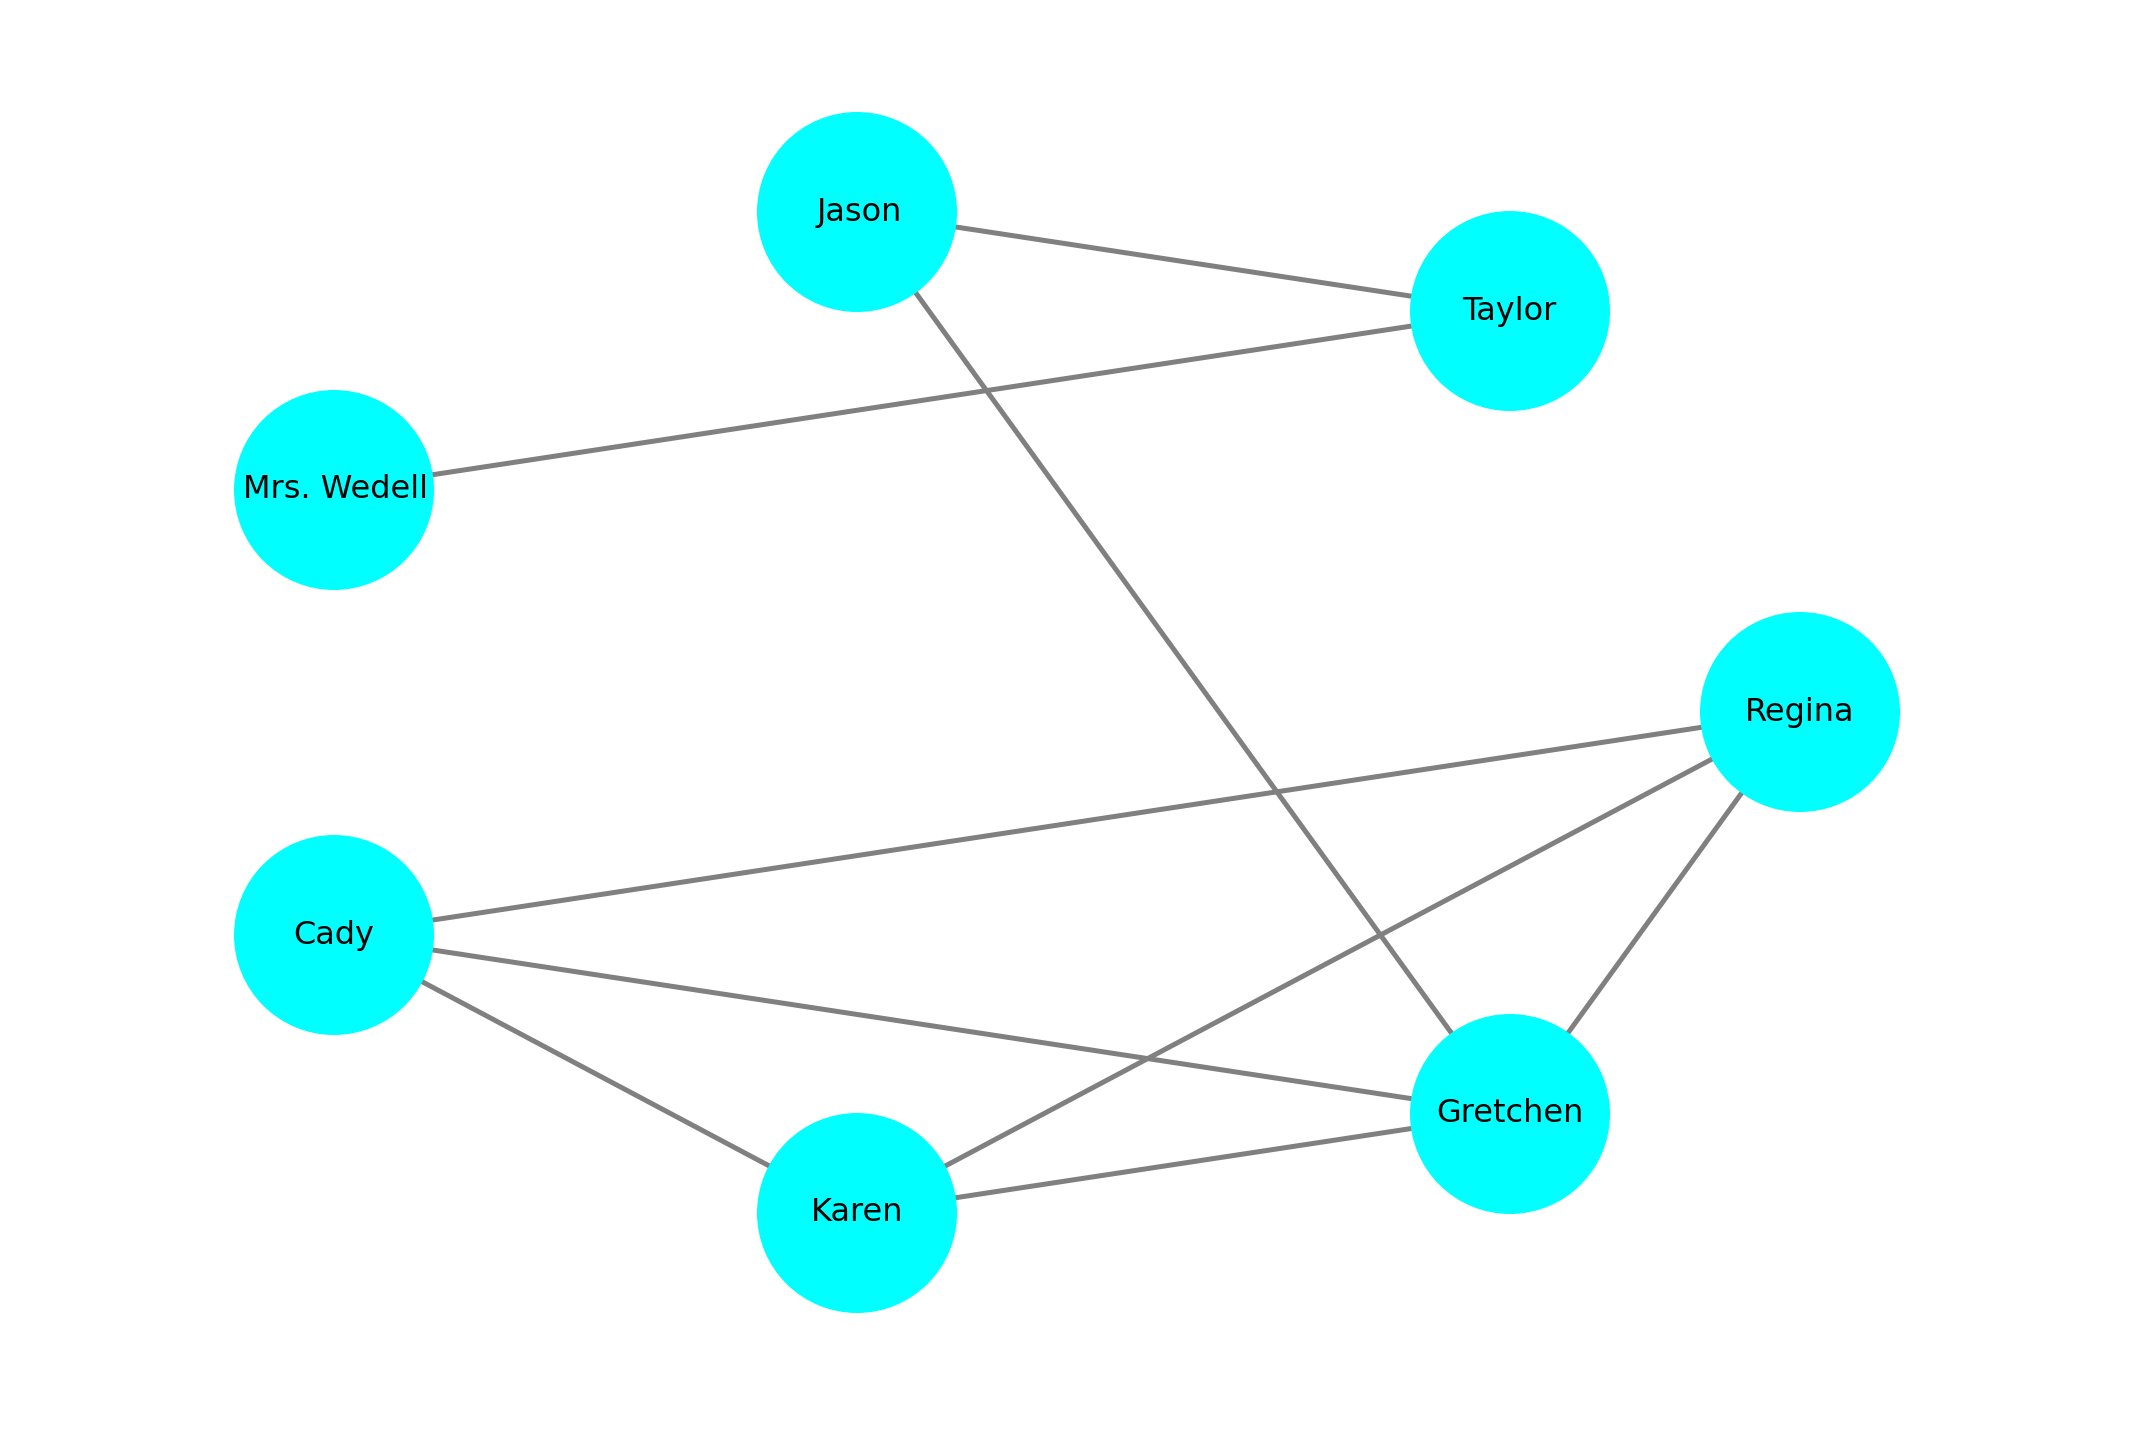

In [19]:
pos = nx.circular_layout(mall_pre_phonecall)

nx.draw_networkx_nodes(mall_pre_phonecall, pos, node_size=40000, node_color='aqua', linewidths=0)
nx.draw_networkx_edges(mall_pre_phonecall, pos, edge_color='gray', width=5)
nx.draw_networkx_labels(mall_pre_phonecall, pos, font_size=32)
plt.axis('off')
plt.tight_layout()

All of a sudden there's a much longer tail on the network. What does this mean for our various measures of centrality?

In [20]:
nx.degree_centrality(mall_pre_phonecall)

{'Cady': 0.5,
 'Gretchen': 0.6666666666666666,
 'Jason': 0.3333333333333333,
 'Karen': 0.5,
 'Mrs. Wedell': 0.16666666666666666,
 'Regina': 0.5,
 'Taylor': 0.3333333333333333}

In [21]:
nx.closeness_centrality(mall_pre_phonecall)

{'Cady': 0.5,
 'Gretchen': 0.6666666666666666,
 'Jason': 0.6,
 'Karen': 0.5,
 'Mrs. Wedell': 0.3333333333333333,
 'Regina': 0.5,
 'Taylor': 0.46153846153846156}

In [22]:
nx.betweenness_centrality(mall_pre_phonecall)

{'Cady': 0.0,
 'Gretchen': 0.6,
 'Jason': 0.5333333333333333,
 'Karen': 0.0,
 'Mrs. Wedell': 0.0,
 'Regina': 0.0,
 'Taylor': 0.3333333333333333}

So, Gretchen is now the most central node in this network. In fact, she serves as a broker here, connecting the sub-networks of Jason-Taylor-Mrs. Wedell and the Plastics. 

In [23]:
mall_without_gretchen = nx.Graph()
list_of_characters.remove('Gretchen')
interactions.remove(('Cady', 'Gretchen'))
interactions.remove(('Regina', 'Gretchen'))
interactions.remove(('Gretchen', 'Karen'))
interactions.remove(('Jason', 'Gretchen'))
mall_without_gretchen.add_nodes_from(list_of_characters)
mall_without_gretchen.add_edges_from(interactions)

In [24]:
print nx.info(mall_without_gretchen)

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 5
Average degree:   1.6667


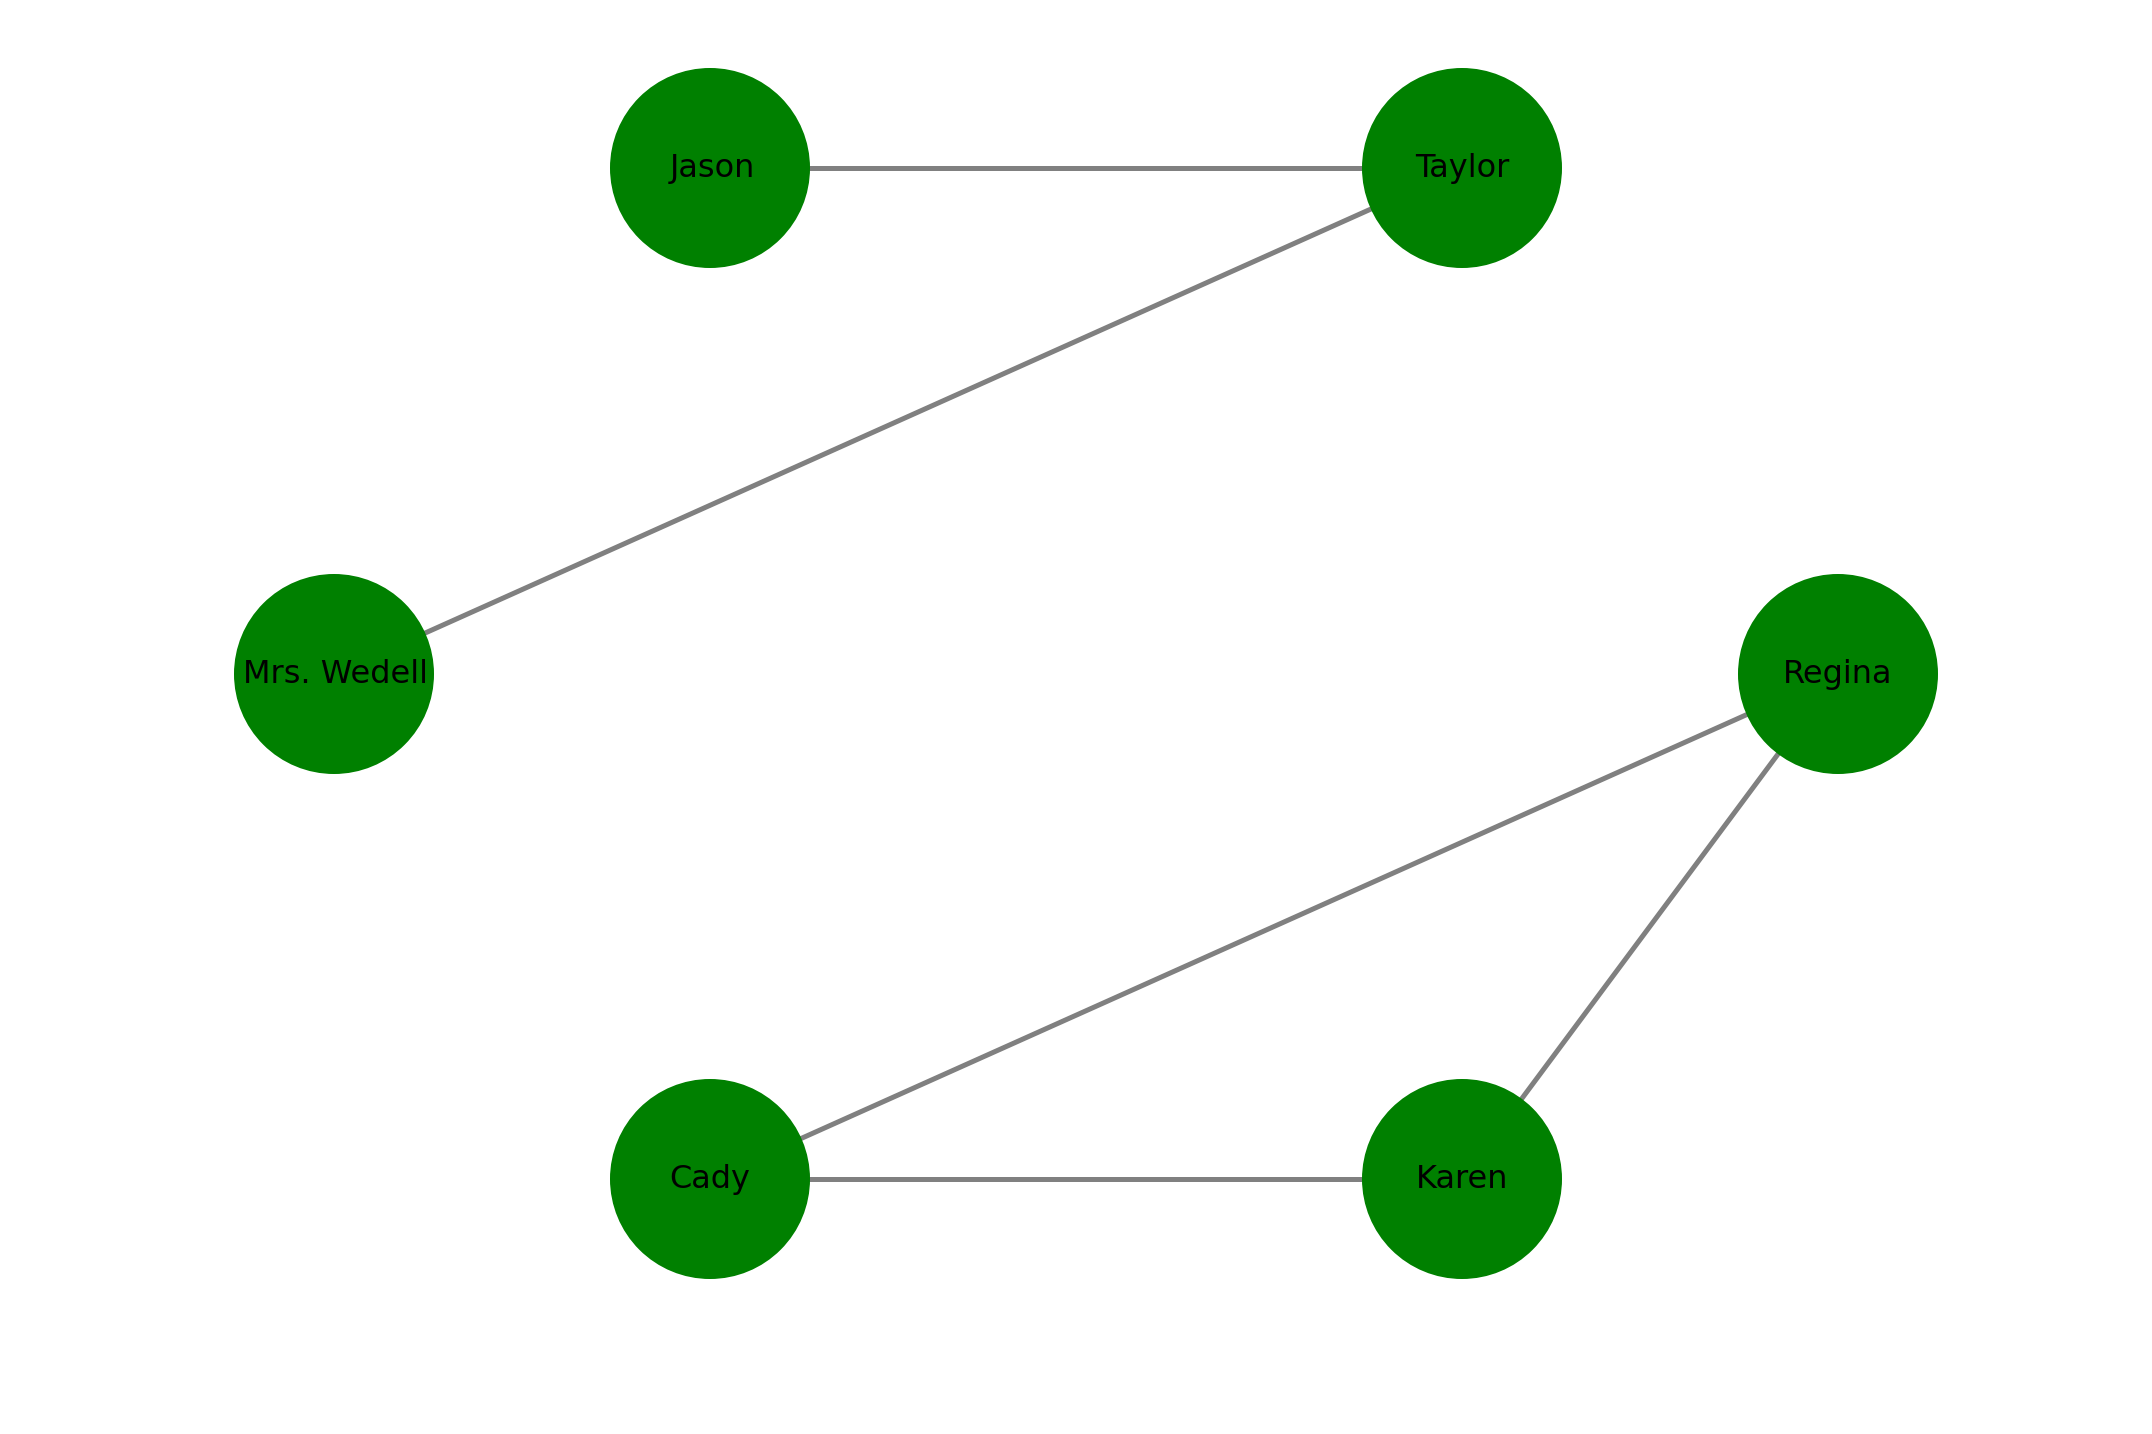

In [25]:
pos = nx.circular_layout(mall_without_gretchen)

nx.draw_networkx_nodes(mall_without_gretchen, pos, node_size=40000, node_color='green', linewidths=0)
nx.draw_networkx_edges(mall_without_gretchen, pos, edge_color='gray', width=5)
nx.draw_networkx_labels(mall_without_gretchen, pos, font_size=32)
plt.axis('off')
plt.tight_layout()